In [41]:
import numpy as np
import matplotlib.pyplot as plt

### ЗАДАЕМ ПАРАМЕТР Θ

In [42]:
teta = 10

### ГЕНЕРИРУЕМ ВЫБОРКУ

In [43]:
sample = np.round(np.random.uniform(teta, 2 * teta, size = 100), 3)
print(sample)

[14.327 12.146 15.277 12.901 19.623 12.289 19.561 13.191 14.793 17.995
 18.056 19.884 17.156 18.419 12.171 13.708 16.49  12.11  17.72  19.334
 15.222 11.182 13.432 12.446 17.994 11.604 17.854 19.438 13.84  15.495
 18.84  10.077 18.958 19.418 10.166 18.339 18.576 16.738 18.62  14.384
 19.733 19.607 10.819 13.212 11.27  18.692 17.646 18.828 18.451 11.616
 19.547 18.324 14.99  10.249 14.791 15.571 18.121 19.575 11.531 15.409
 18.821 11.981 18.213 13.24  17.477 19.621 17.15  14.542 19.544 12.457
 15.441 10.498 19.261 11.498 13.978 17.641 18.42  11.287 19.51  14.846
 17.221 17.46  10.196 13.617 19.22  13.716 18.627 12.746 18.151 16.777
 11.604 19.3   10.803 13.673 17.451 10.71  14.421 12.36  17.86  19.565]


### ОЦЕНКА ПО ОММ : 2/3 < x >

In [44]:
omm = 2 / 3 * np.mean(sample)
print(f"Оценка методом моментов: {np.round(omm, 3)}")

Оценка методом моментов: 10.458


### ОЦЕНКА ПО ОМП : x max / 2

In [45]:
omp = sample.max() / 2
print(f"Оценка методом максимального правдоподобия: {np.round(omp, 3)}")

Оценка методом максимального правдоподобия: 9.942


### BOOTSTRAP

In [46]:
omm_bootstrap = np.array([])
omp_bootstrap = np.array([])
for _ in range (1000):
    subsample = np.random.choice(sample, 100, replace = True)
    
    i_omm = 2 / 3 * np.mean(subsample)    
    omm_bootstrap = np.append(omm_bootstrap, i_omm - omm)
    
omm_bootstrap = np.sort(omm_bootstrap)

In [47]:
def hystogramma(x : list[float], msg) -> None:
    n = int(1 + np.log2(len(x)))  
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(x, bins=n, density=True, color = "royalblue")
    plt.title(msg, fontsize=20)
    plt.show()

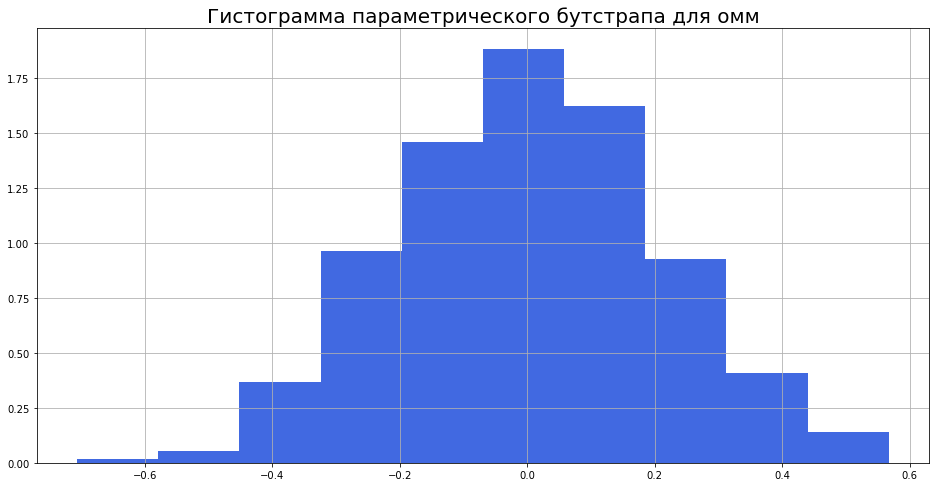

In [48]:
hystogramma(omm_bootstrap, "Гистограмма параметрического бутстрапа для омм")

### Доверительные интервалы

In [49]:
acc_left = np.round(np.max(sample) / (0.975 + 1), 3)
acc_right = np.round(np.max(sample) / (0.025 + 1), 3)
acc_len = np.round(acc_right - acc_left)
print(f"Точный доверительный интервал для омм: {acc_left} < Θ < {acc_right}, длина интервала: {acc_len}")

Точный доверительный интервал для омм: 10.068 < Θ < 19.399, длина интервала: 9.0


In [50]:
m1 = np.mean(sample)
m2 = np.mean(sample ** 2)
asymp_omm_left = np.round(-(2/3 * ((m2 - m1 ** 2) ** 0.5) * 1.96 / (100) ** 0.5 - omm), 3)
asymp_omm_right = np.round(-(2/3 * ((m2 - m1 ** 2) ** 0.5) * -1.96 / (100) ** 0.5 - omm), 3)
asymp_omm_len = np.round(asymp_omm_right - asymp_omm_left, 3)
print(f"Асимптотический доверительный интервал для омм: \
{asymp_omm_left} < Θ < {asymp_omm_right}, длина интервала: {asymp_omm_len}")

Асимптотический доверительный интервал для омм: 10.051 < Θ < 10.864, длина интервала: 0.813


In [51]:
boot_omm_left = np.round(omm - omm_bootstrap[975], 3)
boot_omm_right = np.round(omm - omm_bootstrap[25], 3)
boot_omm_len = np.round(omm_right - omm_left, 3)
print(f"Доверительный интервал для омм по bootstrap:\
{boot_omm_left} < Θ < {boot_omm_right}, длина интервала: {boot_omm_len}")

Доверительный интервал для омм по bootstrap:10.055 < Θ < 10.843, длина интервала: 0.718


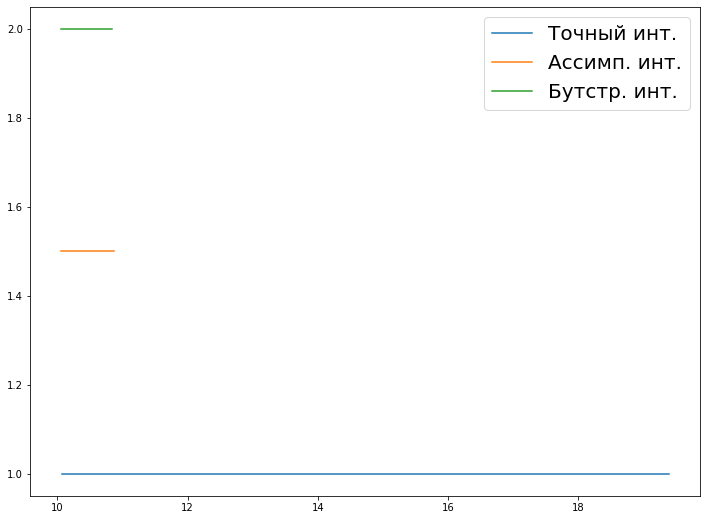

In [52]:
plt.figure(figsize = (12, 9))
plt.plot([acc_left, acc_right], [1, 1], label = "Точный инт.")
plt.plot([asymp_omm_left, asymp_omm_right], [1.5, 1.5], label = "Ассимп. инт.")
plt.plot([boot_omm_left, boot_omm_right], [2, 2], label = "Бутстр. инт.")
plt.legend(prop = {"size" : 20})
plt.show()

In [53]:
vals = [[acc_len, "Точный доверительный интервал"], 
        [asymp_omm_len, "Асимптотический интервал"], 
        [omm_len, "Бутстраповский интервал"]]
shortest = min(vals, key = lambda arr : arr[0])
print(f"{shortest[1]} является самым коротким среди доверительных интервалов, его длина: {shortest[0]}")

Бутстраповский интервал является самым коротким среди доверительных интервалов, его длина: 0.718
